In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [71]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

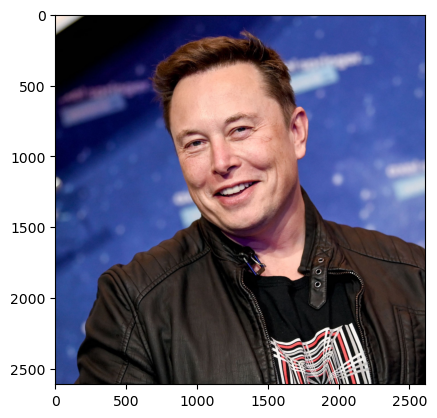

In [72]:
filename = 'elon.jpg'
img = read_file(filename)

org_img = np.copy(img)

In [73]:
# create edge mask

def edge_mask(img, line_size, blur_value):
    """
    input: Scale Image
    Output: Edges of Images
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 
                                  line_size, blur_value)
    
    return edges

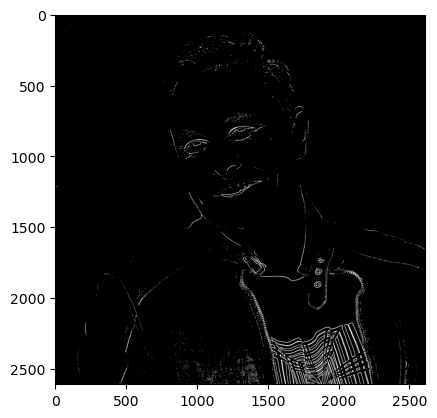

In [74]:
line_size, blur_value = 7,7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap="binary")
plt.show()

In [75]:
# Reduce the Color Palette 

def color_quantization(img, k):
    
    # Transform the image
    data = np.float32(img).reshape((-1,3))
    
    #Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    # Implement K-Means
    
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

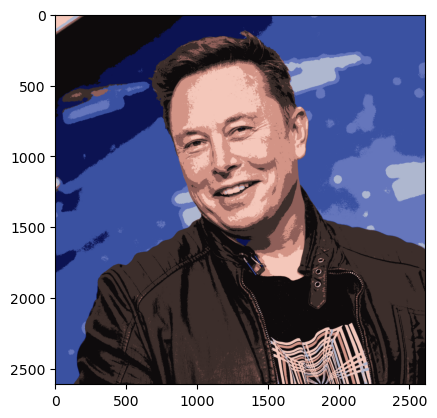

In [76]:
img = color_quantization(img, k=9)

plt.imshow(img)
plt.show()

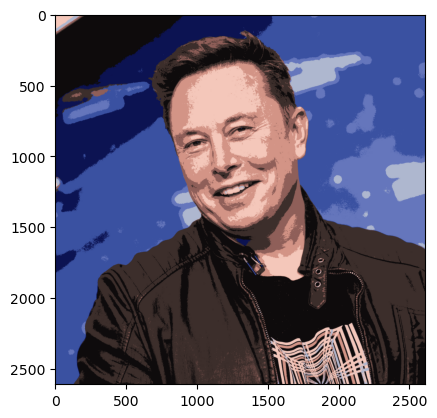

In [77]:
# Reduce the noise

blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [78]:
# Combine Edge Mask with quantize img

def cartoon(blurred):
    c = cv2.bitwise_and(blurred, blurred, mask=edges)
    
    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()
    
    plt.imshow(org_img)
    plt.title("Orignal Image")
    plt.show()

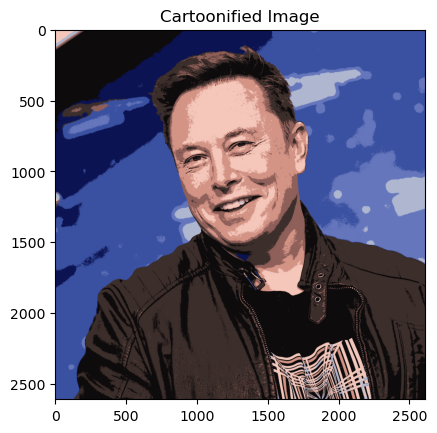

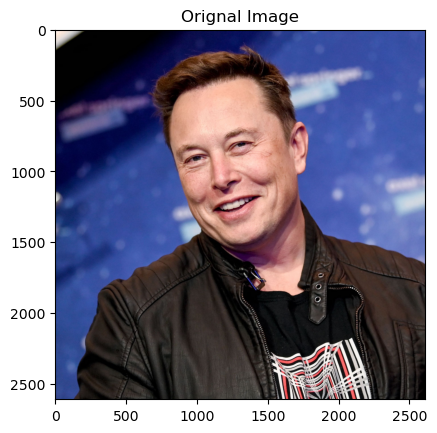

In [79]:
cartoon(blurred)